# Calculus I: Excercise Regression

In [2]:
import numpy as np
import pandas as pd
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
y = torch.tensor(df.Sales.values)[:9]
y

tensor([22.1000, 10.4000,  9.3000, 18.5000, 12.9000,  7.2000, 11.8000, 13.2000,
         4.8000], dtype=torch.float64)

In [ ]:
# X = torch.tensor(np.array(df.loc[:, ['TV', 'Radio', 'Newspaper']].values))
# X.shape

In [6]:
x = torch.tensor(np.array(df.loc[:, 'TV'].values)[:9]) # only TV variable
x.shape

torch.Size([9])

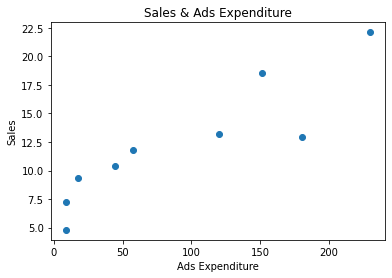

In [7]:
fig, ax = plt.subplots()
plt.title("Sales & Ads Expenditure")
plt.xlabel("Ads Expenditure")
plt.ylabel("Sales")
_ = ax.scatter(x, y)

In [8]:
m = torch.tensor([-.2]).requires_grad_() 
# m2 = torch.tensor(np.random.random(1)).requires_grad_()
# m3 = torch.tensor(np.random.random(1)).requires_grad_()
b = torch.tensor([2.]).requires_grad_()

In [9]:
# print(m1,m2,m3,b)
print(m,b)

tensor([-0.2000], requires_grad=True) tensor([2.], requires_grad=True)


In [ ]:
# def regression(X, m1, m2, m3, b):
#     x1, x2, x3 = X[:,0], X[:,1], X[:,2]
#     return m1*x1 + m2*x2 + m3*x3 + b

In [10]:
def regression(x, m, b):
    return m*x + b

In [11]:
def regression_plot(x, y, m, b):
    
    fig, ax = plt.subplots()

    ax.scatter(x, y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, m, b).detach().item()
    y_max = regression(x_max, m, b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

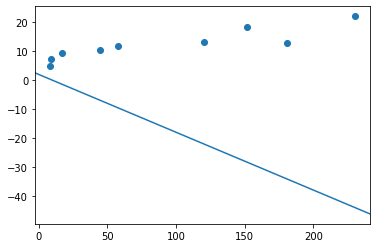

In [12]:
regression_plot(x, y, m, b)

In [13]:
# 1) forward pass: find yhat
yhat = regression(x, m, b)
yhat

tensor([-44.0200,  -6.9000,  -1.4400, -28.3000, -34.1600,   0.2600,  -9.5000,
        -22.0400,   0.2800], dtype=torch.float64, grad_fn=<AddBackward0>)

In [14]:
# 2) calculate LOSS
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [15]:
C = mse(yhat, y)
print(C)

tensor(1217.2797, dtype=torch.float64, grad_fn=<DivBackward0>)


In [16]:
# 3) Use autodiff to calculate gradient of C w.r.t. parameters 
C.backward()

In [17]:
m.grad

tensor([-8294.9521])

In [18]:
# m2.grad

In [19]:
# m3.grad

In [20]:
b.grad

tensor([-56.8933])

In [21]:
optimizer = torch.optim.SGD([m, b], lr=.01)

In [22]:
# recall the initial values of the parameters
print(m, b)

tensor([-0.2000], requires_grad=True) tensor([2.], requires_grad=True)


In [23]:
optimizer.step()

In [24]:
print(m, b)

tensor([82.7495], requires_grad=True) tensor([2.5689], requires_grad=True)


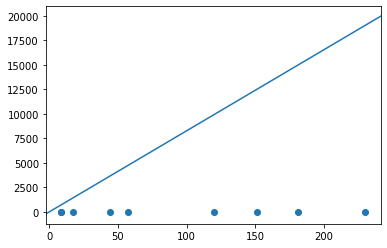

In [25]:
regression_plot(x, y, m, b)

In [27]:
C = mse(regression(x, m, b), y)
C

tensor(97765787.4111, dtype=torch.float64, grad_fn=<DivBackward0>)

In [ ]:
epochs = 100
for epoch in range(epochs):
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhat = regression(X,m,b) # Step 1
    C = mse(yhat, y) # Step 2
    
    C.backward() # Step 3
    optimizer.step() # Step 4
    
    print('Epoch {}, loss {}'.format(epoch, '%.3g' % C.item()))

Epoch 0, loss 7.89e+07
Epoch 1, loss 2.56e+11
Epoch 2, loss 8.28e+14
Epoch 3, loss 2.68e+18
Epoch 4, loss 8.68e+21
Epoch 5, loss 2.81e+25
Epoch 6, loss 9.11e+28
Epoch 7, loss 2.95e+32
Epoch 8, loss 9.56e+35
Epoch 9, loss 3.1e+39
Epoch 10, loss 1e+43
Epoch 11, loss 3.25e+46
Epoch 12, loss 1.05e+50
Epoch 13, loss 3.41e+53
Epoch 14, loss 1.1e+57
Epoch 15, loss 3.58e+60
Epoch 16, loss 1.16e+64
Epoch 17, loss 3.75e+67
Epoch 18, loss 1.22e+71
Epoch 19, loss 3.94e+74
Epoch 20, loss 1.27e+78
Epoch 21, loss 4.13e+81
Epoch 22, loss 1.34e+85
Epoch 23, loss 4.33e+88
Epoch 24, loss 1.4e+92
Epoch 25, loss 4.55e+95
Epoch 26, loss 1.47e+99
Epoch 27, loss 4.77e+102
Epoch 28, loss 1.54e+106
Epoch 29, loss 5e+109
Epoch 30, loss 1.62e+113
Epoch 31, loss 5.25e+116
Epoch 32, loss 1.7e+120
Epoch 33, loss 5.51e+123
Epoch 34, loss 1.78e+127
Epoch 35, loss 5.78e+130
Epoch 36, loss 1.87e+134
Epoch 37, loss 6.06e+137
Epoch 38, loss 1.96e+141
Epoch 39, loss 6.36e+144
Epoch 40, loss 2.06e+148
Epoch 41, loss 6.67e+1